In [1]:
import pandas as pd

In [5]:
df1=pd.read_csv("Delhi house data.csv")

In [6]:
df1


,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0
...,...,...,...,...,...,...,...,...,...,...,...
1254,4118.0,4,5.0,Unfurnished,Chittaranjan Park,3.0,55000000,Ready_to_move,New_Property,Builder_Floor,12916.0
1255,1050.0,3,2.0,Semi-Furnished,Chittaranjan Park,3.0,12500000,Ready_to_move,Resale,Builder_Floor,12916.0
1256,875.0,3,3.0,Semi-Furnished,Chittaranjan Park,3.0,17500000,Ready_to_move,New_Property,Builder_Floor,12916.0
1257,990.0,2,2.0,Unfurnished,Chittaranjan Park Block A,1.0,11500000,Ready_to_move,Resale,Builder_Floor,12916.0


In [19]:
df = df1.iloc[:,[0,1, 2, 6]].head(10)


In [20]:
df

,Area,BHK,Bathroom,Price
0,800.0,3,2.0,6500000
1,750.0,2,2.0,5000000
2,950.0,2,2.0,15500000
3,600.0,2,2.0,4200000
4,650.0,2,2.0,6200000
5,1300.0,4,3.0,15500000
6,1350.0,4,3.0,10000000
7,650.0,2,2.0,4000000
8,985.0,3,3.0,6800000
9,1300.0,4,4.0,15000000


In [21]:
import statsmodels.api as sm

In [22]:
x1=df['Area'].tolist()
x2=df['BHK'].tolist()
x3=df['Bathroom'].tolist()
y=df['Price']

In [26]:
# Now we want from feature 1 and target as Y (Price )
x1=sm.add_constant(x1)
lmRegModel=sm.OLS(y,x1)
result=lmRegModel.fit()
print(result)
result.summary()

C:\DataScience\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.621
Model:                            OLS   Adj. R-squared:                  0.573
Method:                 Least Squares   F-statistic:                     13.09
Date:                Wed, 15 May 2024   Prob (F-statistic):            0.00680
Time:                        14:32:55   Log-Likelihood:                -162.58
No. Observations:                  10   AIC:                             329.2
Df Residuals:                       8   BIC:                             329.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.121e+06   3.46e+06     -0.903      0.393   -1.11e+07    4.85e+06
x1          1.285e+04   3550.430      3.618      0.007    4657.869     2.1e+04
==============================================================================
Omnibus:                        3.792   Durbin-Watson:                   2.308
Prob(Omnibus):                  0.150   Jarque-Bera (JB):                1.185
Skew:                           0.807   Prob(JB):                        0.553
Kurtosis:                       3.490   Cond. No.                     3.42e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.42e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
result.predict(x1)

array([ 7155168.98123298,  6512910.17270601,  9081945.4068139 ,
        4586133.74712509,  5228392.55565206, 13577757.06650271,
       14220015.87502968,  5228392.55565206,  9531526.57278278,
       13577757.06650271])

In [29]:
from matplotlib import pyplot as plt

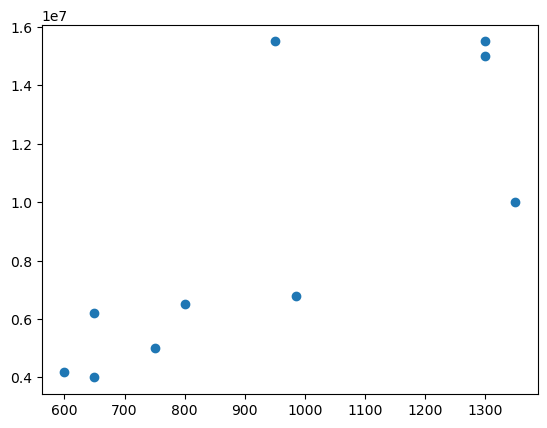

In [30]:
plt.scatter(df['Area'],df['Price'])

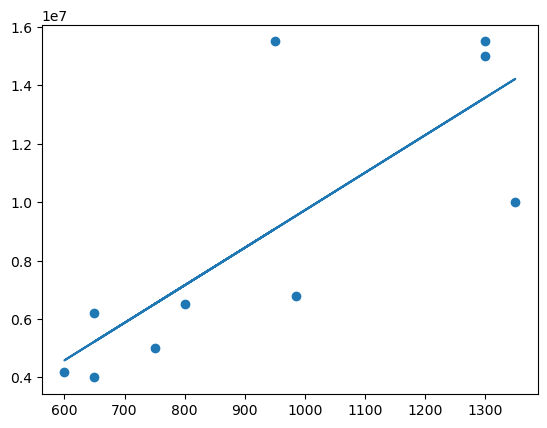

In [32]:
plt.scatter(df['Area'],df['Price'])
plt.plot(df['Area'],result.predict(x1))

In [33]:
result.predict(20)

ValueError: shapes (1,1) and (2,) not aligned: 1 (dim 1) != 2 (dim 0)

In [34]:
result.predict([1])

ValueError: shapes (1,1) and (2,) not aligned: 1 (dim 1) != 2 (dim 0)

In [35]:
result.predict([5,5])

array([-15540633.89514022])